<div class="frontmatter text-center">
<h1>Introduction to Data Science and Programming</h1>
<h2>Lecture 14: Data relationships</h2>
<h3>IT University of Copenhagen, Fall 2022</h3>
<h3>Instructor: Michael Szell</h3>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Loading a mixed variable type data set

In [5]:
# Data set downloaded from: https://www.kaggle.com/mirichoi0218/insurance/downloads/insurance.zip/1
!head files/insurance.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


The data set contains demographic information about individuals, where they live (region), whether they smoke, and how much they pay for health insurance (charges).

We read the data as structured arrays using `numpy.genfromtxt` with `dtype=None`. `names=True` ensures we can access single columns using the header. More info: https://numpy.org/devdocs/user/basics.io.genfromtxt.html

In [8]:
# dtype=None in genfromtxt(), then you can add different types in NumPy
# names=True, makes headerfile the key in dictionary, and you can query each element in headerfile. 
# see documentation for genfromtext()
datamixed = np.genfromtxt('files/insurance.csv', delimiter=',', dtype=None, names=True, encoding='utf8') 
print(datamixed)
print(datamixed['smoker'])

[(19, 'female', 27.9 , 0, 'yes', 'southwest', 16884.924 )
 (18, 'male', 33.77, 1, 'no', 'southeast',  1725.5523)
 (28, 'male', 33.  , 3, 'no', 'southeast',  4449.462 ) ...
 (18, 'female', 36.85, 0, 'no', 'southeast',  1629.8335)
 (21, 'female', 25.8 , 0, 'no', 'southwest',  2007.945 )
 (61, 'female', 29.07, 0, 'yes', 'northwest', 29141.3603)]
['yes' 'no' 'no' ... 'no' 'no' 'yes']


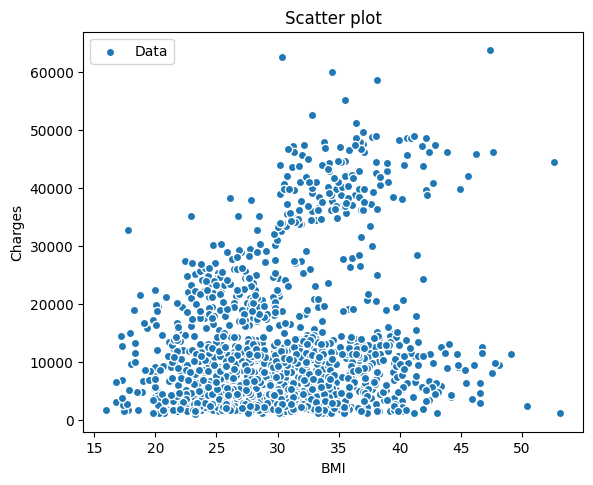

In [7]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'], datamixed['charges'], label='Data', edgecolors='w');
axes.legend(loc='upper left');
axes.set_xlabel('BMI');
axes.set_ylabel('Charges'); 
axes.set_title('Scatter plot');

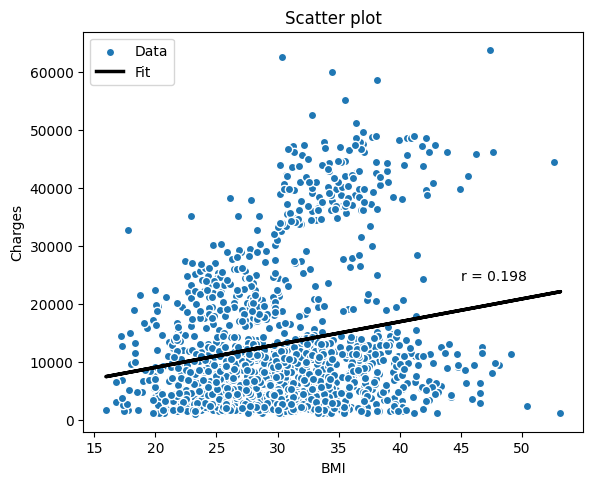

In [9]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'], datamixed['charges'], label='Data', edgecolors='w');

# Plot fit
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'], datamixed['charges']) # not interested in the last 2 return values, hence _, _
line = slope * datamixed['bmi'] + intercept
axes.plot(datamixed['bmi'], line, linewidth=2.5, color='k', label='Fit')

axes.text(45, 24000, "r = " + str(round(r_value, 3)))
axes.legend(loc='upper left'); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

The data points relate in a very weird way. Some stay on the bottom, some go up, and there is some "bottleneck" at BMI=30. Sure, we can fit a linear trend, but is it meaningful? We have to be careful.

Maybe adding information from a categorical variable clears things up:

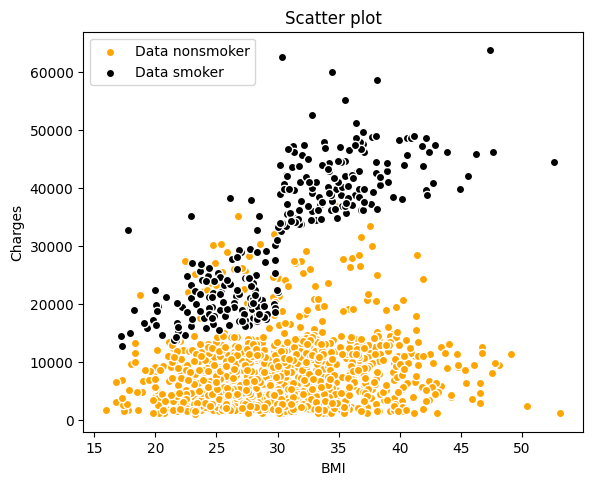

In [10]:
# now integrate categorical value, smokers vs. non-smokers
masksmoker = (datamixed['smoker'] == 'yes')  # Easy indexing: The power of numpy

fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

Aha! We have two sub-groups with different relations: Smokers and non-smokers are treated differently for insurance purposes. Next, let us do the linear regression on each of the sub-groups:

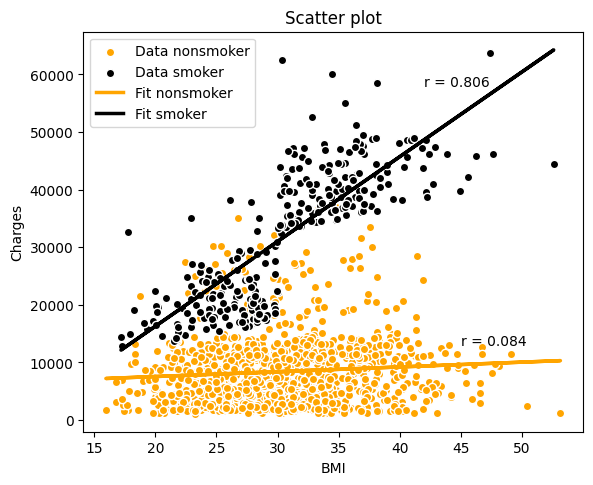

In [11]:
fig = plt.figure(figsize=(5, 4))
axes = fig.add_axes([0, 0, 1, 1])

# Plot data
axes.scatter(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker], color='orange', label="Data nonsmoker", edgecolors='w');
axes.scatter(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker], color='k', label="Data smoker", edgecolors='w');

# Plot fits
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][~masksmoker], datamixed['charges'][~masksmoker])
axes.plot(datamixed['bmi'][~masksmoker], slope * datamixed['bmi'][~masksmoker] + intercept, linewidth=2.5, color='orange', label='Fit nonsmoker')
axes.text(45, 13000, "r = " + str(round(r_value, 3)))
slope, intercept, r_value, _, _ = stats.linregress(datamixed['bmi'][masksmoker], datamixed['charges'][masksmoker])
axes.plot(datamixed['bmi'][masksmoker], slope * datamixed['bmi'][masksmoker] + intercept, linewidth=2.5, color='k', label='Fit smoker')
axes.text(42, 58000, "r = " + str(round(r_value, 3)))

axes.legend(); axes.set_xlabel('BMI'); axes.set_ylabel('Charges'); axes.set_title('Scatter plot');

Our conclusion, if we stop here:
* **For non-smokers**: There is a very weak linear relation between BMI and charges. Apparently the insurance does not care too much about your BMI if you do not smoke
* **For smokers**: There seem to be 2 sub-groups of smokers treated differently by the insurance: Those with BMI below 30 and those with BMI above 30. The linear regression through both these groups shows that High-BMI smokers pay higher charges. This should not be the end of the analysis, however: Since we have two sub-groups, we have to question whether a linear regression through them is justified.

## Relating categorical and quantitative data

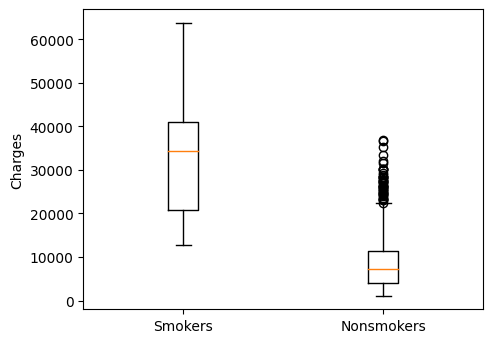

In [13]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot([datamixed['charges'][masksmoker], datamixed['charges'][~masksmoker]]);

axes.set_ylabel('Charges')
axes.set_xticklabels(['Smokers', 'Nonsmokers']);

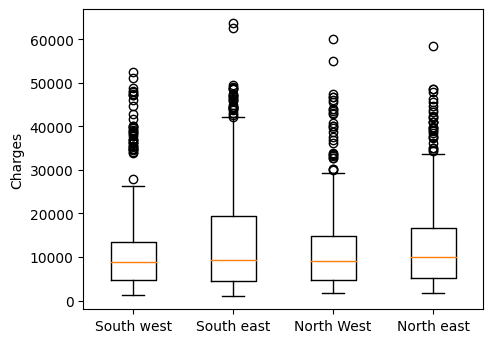

In [14]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.boxplot([datamixed['charges'][datamixed['region'] == 'southwest'],
              datamixed['charges'][datamixed['region'] == 'southeast'], 
              datamixed['charges'][datamixed['region'] == 'northwest'], 
              datamixed['charges'][datamixed['region'] == 'northeast']]);

axes.set_ylabel('Charges')
axes.set_xticklabels(['South west', 'South east', 'North West', 'North east']);